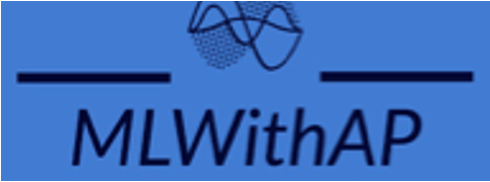

#  Broadcasting

NumPy's universal functions can be used to **vectorize** operations and thereby remove slow Python loops.

Another means is to use NumPy's **broadcasting** functionality.



## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [50]:
import numpy as np

In [51]:
#non-vectorized ; looping using list
a = [1, 2, 3]
b = [4, 5, 6]
result = []
for i in range(len(a)):
    result.append(a[i] + b[i])
result

[5, 7, 9]

In [52]:
#vectorized using ndarray
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = a + b

result

array([5, 7, 9])

In [54]:
#Broadcasting 

import numpy as np

a = np.array([1, 2, 3])
#b = 2
b = np.array([2, 2, 2])

result = a + b
print(result)


[3 4 5]


In [55]:
a + b 

array([3, 4, 5])

In [44]:
# How this works ? Scaler and ndarray ?

a + 5

array([6, 7, 8])

Broadcasting : Mental Model: Easy way to remember: 

operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.

It actually doesn't happen but good way to understand it. 

We can  extend this to arrays of higher dimension. 

In [56]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [57]:
a

array([1, 2, 3])

In [58]:
M + a

array([[2., 3., 4.],
       [2., 3., 4.],
       [2., 3., 4.]])

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [60]:
#broadcasting 1X3 to 3 X1 matrices. Both are augmented and then element wise added 

a = np.array([[0 , 1, 2]])

b = np.array([[0],
              [1],
              [2]
             ])

print(a)
print(a.shape)
print(b)
print(b.shape)

[[0 1 2]]
(1, 3)
[[0]
 [1]
 [2]]
(3, 1)


In [61]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])



<div>
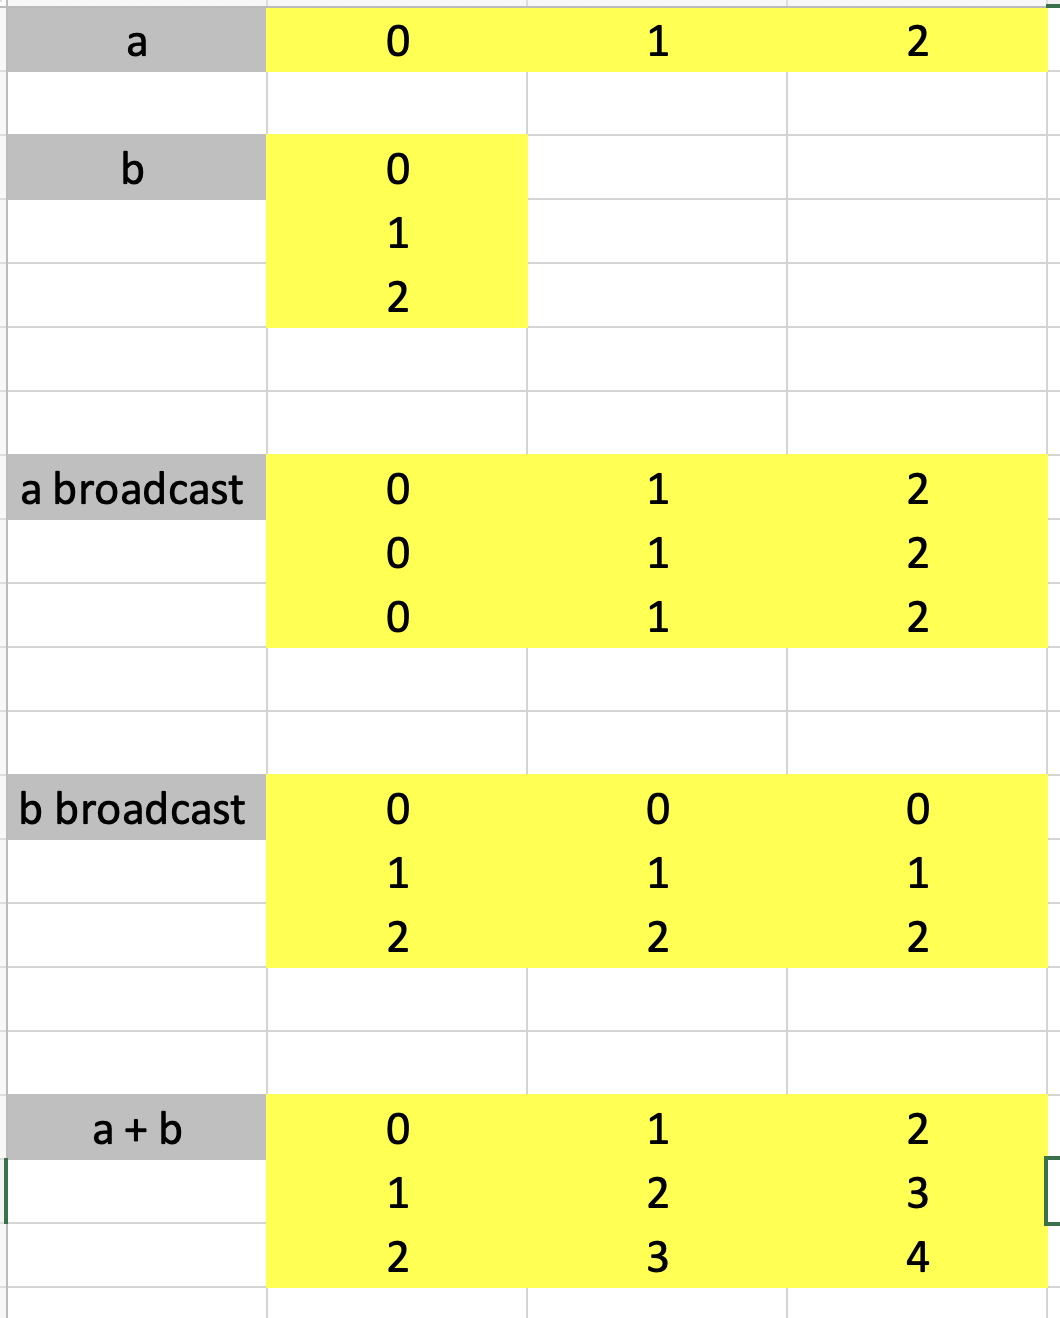
</div>

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [62]:
M = np.ones((2, 3))
a = np.arange(3)

In [63]:
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [64]:
a

array([0, 1, 2])

In [65]:
M.shape

(2, 3)

In [66]:
a.shape

(3,)

In [67]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [68]:
(M+a).shape

(2, 3)

### Explanation with above rules !

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [69]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [70]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [71]:
a

array([[0],
       [1],
       [2]])

In [72]:
a.shape

(3, 1)

In [73]:
b

array([0, 1, 2])

In [74]:
b.shape

(3,)

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [75]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [76]:
M = np.ones((3, 2))
a = np.arange(3)

In [77]:
M


array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [78]:
M.shape

(3, 2)

In [79]:
a

array([0, 1, 2])

In [80]:
a.shape

(3,)

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [81]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

# End